In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load player stats
We'll be trying to model players' position as a function of their heigh and weight.
For those unfamiliar with basketball, there are typically five positions which correspond to where players are positioned on the court and the roles they play during offense and defense.
- GoalKeeper (GK)
- Defender (Shooting Guard)
- Midfilder(MF)
- Foward (FWD)
- Striker (STK)



In [2]:
class_data_url='/content/car_sales.csv'
df_frame = pd.read_csv(class_data_url)
df_frame.index += 1
df_frame.head()

,manufact,model,sales,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
1,Acura,Integra,16.919,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28
2,Acura,TL,39.384,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25
3,Acura,CL,14.114,,3.2,225,106.9,70.6,192,3.47,17.2,26
4,Acura,RL,8.588,42,3.5,210,114.6,71.4,196.6,3.85,18,22
5,Audi,A4,20.397,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27


In [3]:
# prompt: list all the features

features = list(df_frame.columns)
for feature in features:
  print(feature)


manufact
model
sales
price
engine_s
horsepow
wheelbas
width
length
curb_wgt
fuel_cap
mpg


In [5]:
df_frame.isnull().any()

manufact    False
model       False
sales       False
price       False
engine_s    False
horsepow    False
wheelbas    False
width       False
length      False
curb_wgt    False
fuel_cap    False
mpg         False
dtype: bool

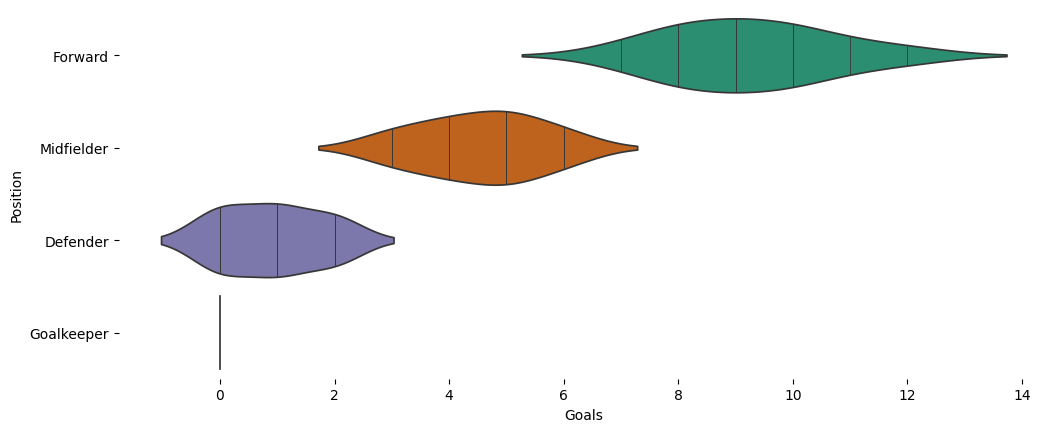

In [ ]:
# @title position vs height

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_frame['Position'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_frame, x='Goals', y='Position', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Name
Height (cm)
Weight (kg)
Position
Goals
Shots
Nationality
Age
Assists
Pass Accuracy (%)
Minutes Played
Yellow Cards
Red Cards
Fouls
Interceptions
Tackles
Saves
Crosses
Speed 
Dribbles
Key Passes
Clearances
Headers Won
Offsides
Successful Tackles (%)
Blocks
Errors Leading to Goal
Penalties Won
Penalties Conceded
Aerial Duels Won
Aerial Duels Lost
Long Balls
Free Kicks


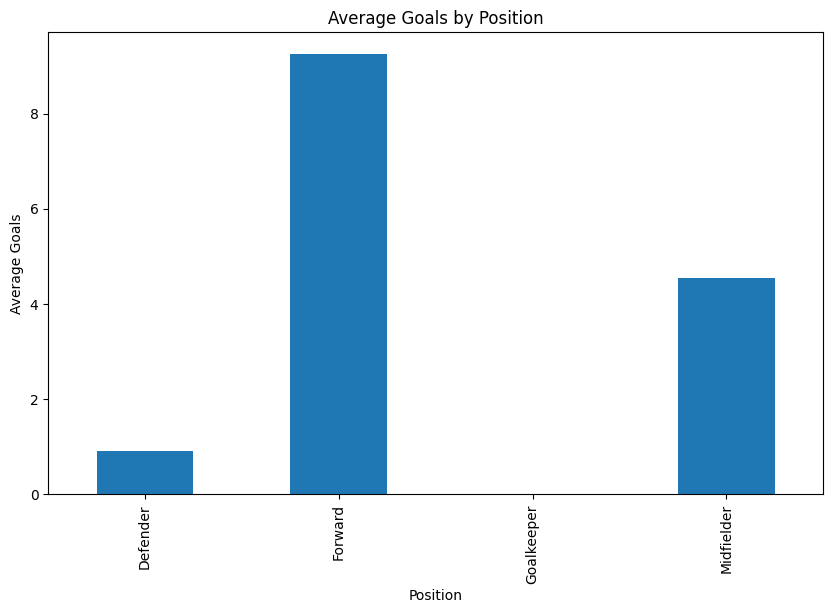

In [ ]:
# prompt: plot the above in a bar chart

import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
#

warnings.filterwarnings('ignore')
# # Load player stats
# We'll be trying to model players' position as a function of their heigh and weight.
# For those unfamiliar with basketball, there are typically five positions which correspond to where players are positioned on the court and the roles they play during offense and defense.
# - GoalKeeper (GK)
# - Defender (Shooting Guard)
# - Midfilder(MF)
# - Foward (FWD)
# - Striker (STK)
#
#
class_data_url='/content/Soccer Dataset.csv'
df_frame = pd.read_csv(class_data_url)
df_frame.index += 1
df_frame.head()

features = list(df_frame.columns)
for feature in features:
  print(feature)

# group by position and calculate mean goals
position_goals = df_frame.groupby('Position')['Goals'].mean()

# create bar chart
plt.figure(figsize=(10,6))
position_goals.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Average Goals')
plt.title('Average Goals by Position')
plt.show()


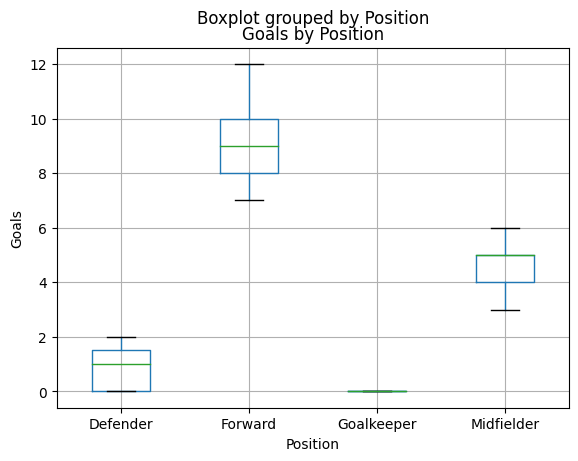

In [ ]:
# @title Height by Position

import matplotlib.pyplot as plt
df_frame.boxplot(column='Goals', by='Position')
plt.xlabel('Position')
plt.ylabel('Goals')
_ = plt.title('Goals by Position')

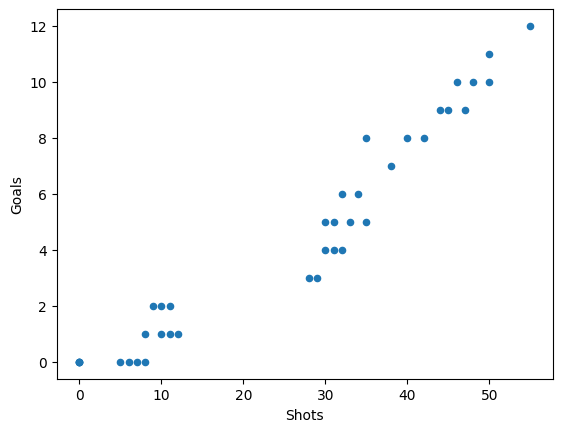

In [ ]:
# prompt: generate scatter plot

df_frame.plot.scatter(x='Shots', y='Goals')
plt.show()

<Axes: xlabel='Shots', ylabel='Goals'>

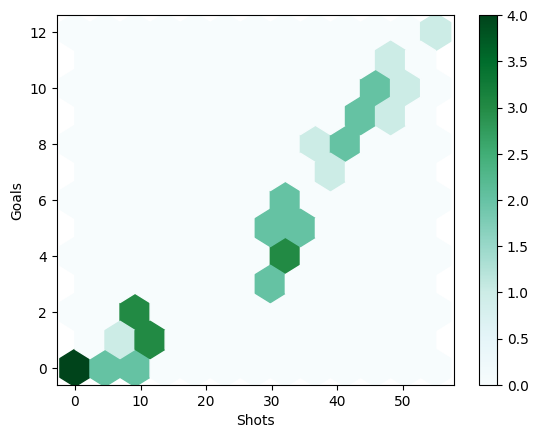

In [ ]:
df_frame.plot(x='Shots',y='Goals', kind='hexbin', gridsize=12)

In [ ]:
alt.Chart(df_frame).mark_point().encode(
    alt.X('Shots', scale=alt.Scale(zero=False)),
    alt.Y('Goals', scale=alt.Scale(zero=False)),

    color='Position'
)

alt.Chart(...)

In [ ]:
# prompt: generate R Square and P Value score for the above chart

import statsmodels.api as sm

# Get the dependent and independent variables
y = df_frame['Goals']
X = df_frame[['Shots']]

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the R-squared and p-value
print(f"R-squared: {model.rsquared:.4f}")
print(f"P-value: {model.pvalues[1]:.4f}")


R-squared: 0.9312
P-value: 0.0000


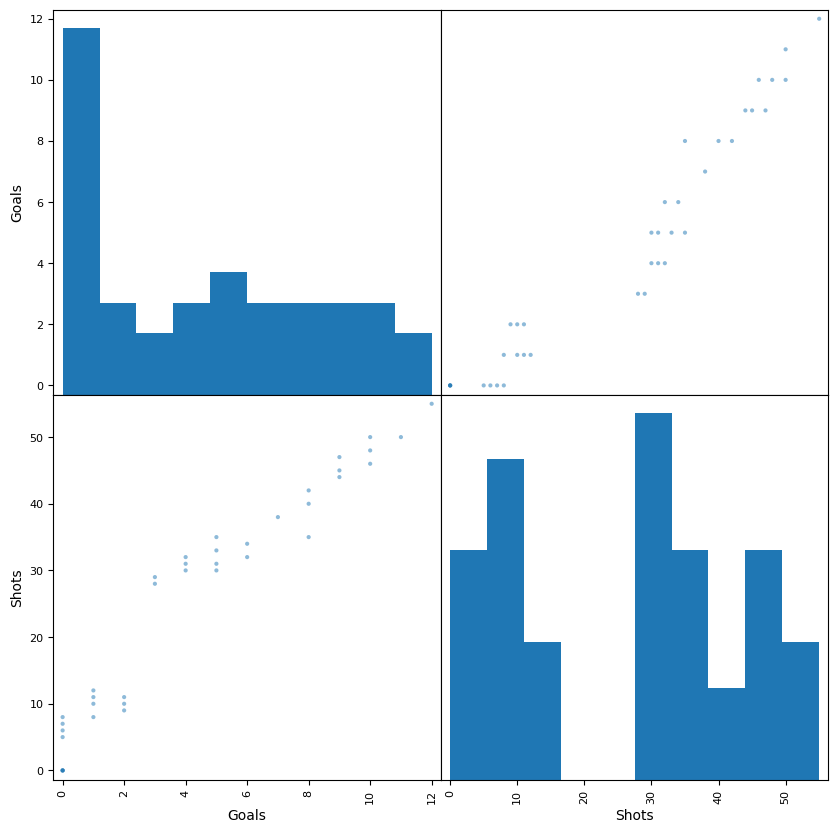

In [ ]:
# prompt: plot scatter matrix excluding index

pd.plotting.scatter_matrix(df_frame[['Goals', 'Shots', 'Position']], figsize=(10, 10), diagonal='hist')
plt.show()


**Load Libraries for PCA**

In [ ]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
import pandas as pd # pandas

# K-Means
(A reminder of what clustering looks like for this data.)

In [ ]:
#df_hw_frame = df_frame[['Goals', 'Shots']]
#df_hw_frame.head()

,Goals,Shots
1,10,50
2,4,30
3,1,10
4,0,0
5,8,40


from matplotlib import pyplot as plt
_df_0['Goals'].plot(kind='hist', bins=20, title='Goals')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Shots'].plot(kind='hist', bins=20, title='Shots')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Goals', y='Shots', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Goals'].plot(kind='line', figsize=(8, 4), title='Goals')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Shots'].plot(kind='line', figsize=(8, 4), title='Shots')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Standardize (scale, recenter) the height and weight columns - otherwise distances will mostly be based on weight
scaler = skp.StandardScaler()
df_hw_standardized = scaler.fit_transform(df_hw_frame)
df_hw_standardized = pd.DataFrame(df_hw_standardized)
df_hw_standardized.columns = [df_hw_frame[:0]]
df_hw_standardized.head()

,Goals,Shots
0,1.467869,1.417247
1,-0.133443,0.243927
2,-0.934098,-0.929393
3,-1.200984,-1.516053
4,0.934098,0.830587


In [ ]:
df_hw_standardized.tail()

,Goals,Shots
33,-1.200984,-1.516053
34,0.934098,0.947919
35,0.133443,0.302593
36,-1.200984,-1.046725
37,1.200984,1.241249


**Run PCA on the feature set dataframe**

In [ ]:
# prompt: Generate principal components for table above

pca = decomposition.PCA(n_components=2)
df_hw_pca = pca.fit_transform(df_hw_standardized)
df_hw_pca = pd.DataFrame(df_hw_pca)
df_hw_pca.columns = ['PC1', 'PC2']
df_hw_pca.head()


,PC1,PC2
0,2.040085,-0.035795
1,0.078124,0.266841
2,-1.317687,0.003327
3,-1.921235,-0.222788
4,1.247821,-0.073193


In [ ]:
# prompt: load all pca score with column names

pca_columns = ['PC' + str(i) for i in range(1, len(df_hw_pca.columns) + 1)]
df_hw_pca.columns = pca_columns
df_hw_pca.tail()


,PC1,PC2
33,-1.921235,-0.222788
34,1.330787,0.009773
35,0.308324,0.119607
36,-1.589370,0.109077
37,1.726919,0.028472


**Explained variance for each PC**

In [ ]:
# prompt: generate the explain variance for the table above

pca_variances = pca.explained_variance_ratio_
pca_variances = pd.DataFrame(pca_variances)
pca_variances.columns = ['Explained Variance']
pca_variances.index = pca_columns
print(pca_variances)


     Explained Variance
PC1            0.982486
PC2            0.017514


In [ ]:
import numpy as np
import plotly.express as px

In [ ]:
print(pca_variances)

     Explained Variance
PC1            0.982486
PC2            0.017514


In [ ]:
# prompt: generate cumulative variance and explained variance

df_hw_pca['Cumulative Variance'] = df_hw_pca['PC1'] + df_hw_pca['PC2']
df_hw_pca.head()

pca_variances['Cumulative Variance'] = pca_variances['Explained Variance'].cumsum()
pca_variances.head()


,Explained Variance,Cumulative Variance
PC1,0.982486,0.982486
PC2,0.017514,1.000000


In [ ]:
# prompt: plot the table above

fig = px.bar(pca_variances, x=pca_columns, y='Explained Variance', title='Explained Variance by PC',
             labels={'Explained Variance': 'Explained Variance', 'PC': 'PC'},
             color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()
fig = px.bar(pca_variances, x=pca_columns, y='Cumulative Variance', title='Cumulative Variance by PC',
             labels={'Cumulative Variance': 'Cumulative Variance', 'PC': 'PC'},
             color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()


# prompt: explain the chart above for easy understanding

The chart above shows the explained variance by each principal component (PC). The explained variance is the proportion of the total variance in the data that is explained by each PC. The first PC explains the most variance, followed by the second PC, and so on.

The cumulative variance is the sum of the explained variance for all PCs up to that point. The cumulative variance chart shows how much of the total variance in the data is explained by the first few PCs.

In this case, the first PC explains about 98% of the total variance in the data. The first two PCs together explain about 100% of the total variance. This means that the first two PCs capture most of the important information in the data.

The explained variance and cumulative variance charts can be used to decide how many PCs to use in a PCA model. A good rule of thumb is to use enough PCs to explain at least 80% of the total variance in the data.

In [ ]:
# prompt: Generate 3 D cluster chart for the cumulative scores for position

fig = px.scatter_3d(df_frame, x='Shots', y='Goals', z='Position', color='Position', title='3D Scatter Plot of Player Height, Weight, and Position')
fig.show()


In [ ]:
# prompt: Generate cluster chart for the cumulative scores for position

df_hw_pca['Position'] = df_frame['Position']
df_hw_pca.head()

fig = px.scatter(df_hw_pca, x="PC1", y="PC2", color="Position",
                 title="Cluster Chart for Cumulative Scores for Position")
fig.show()


**Create KNN and NAIVE BAYES CLUSTER**

In [ ]:
df_hw_frame = df_frame[['Shots', 'Goals']]
df_hw_frame.head()

,Shots,Goals
1,50,10
2,30,4
3,10,1
4,0,0
5,40,8


In [ ]:
# Standardize (scale, recenter) the height and weight columns - otherwise distances will mostly be based on weight
scaler = skp.StandardScaler()
df_hw_frame_hw_standardized = scaler.fit_transform(df_hw_frame)
df_hw_standardized = pd.DataFrame(df_hw_standardized)
df_hw_standardized.columns = [df_hw_frame[:0]]
df_hw_standardized.head()

,Shots,Goals
0,1.467869,1.417247
1,-0.133443,0.243927
2,-0.934098,-0.929393
3,-1.200984,-1.516053
4,0.934098,0.830587


In [ ]:
kmeans_model = skc.KMeans(n_clusters=4)
kmeans_model.fit(df_hw_frame_hw_standardized) # Use the correct variable name here
centroids = kmeans_model.cluster_centers_ # these are the centers of the clusters
centroids = scaler.inverse_transform(centroids) # reverse our standardization if we want them in real units
centroids

array([[ 6.46666667,  0.66666667],
       [49.8       , 10.6       ],
       [31.36363636,  4.54545455],
       [41.57142857,  8.28571429]])

In [ ]:
# Plot the clusters with their centroids.
points_plot = alt.Chart(df_frame).mark_point().encode(
    alt.X('Shots', scale=alt.Scale(zero=False)),
    alt.Y('Goals', scale=alt.Scale(zero=False)),
    color='cluster_labels_kmeans:N'
)
centroid_plot = alt.Chart(pd.DataFrame(centroids)).mark_point(shape='diamond',color='black').encode(
    x='1:Q', y='0:Q'
)
(points_plot + centroid_plot)

alt.LayerChart(...)

**Here's the original data as a reminder**(Do you see the difference?)

In [ ]:
alt.Chart(df_frame).mark_point().encode(
    alt.X('Shots', scale=alt.Scale(zero=False)),
    alt.Y('Goals', scale=alt.Scale(zero=False)),
    color='Position'
)

alt.Chart(...)

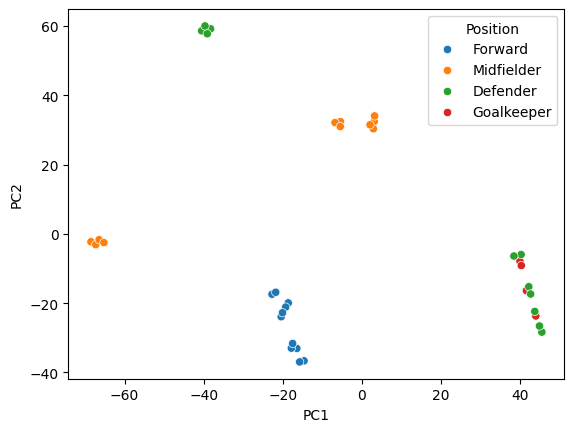

In [ ]:
# prompt: Plot tSNE

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate='auto',
             init='random', perplexity=3)
tsne_results = tsne.fit_transform(df_hw_standardized)

# Create a DataFrame from the results
df_tsne = pd.DataFrame(data=tsne_results, columns=['PC1', 'PC2'])

# Add labels to the DataFrame
df_tsne['Position'] = df_frame['Position']

# Plot the results
sns.scatterplot(x="PC1", y="PC2", hue="Position", data=df_tsne)
plt.show()


In [ ]:
# prompt: Plot 3D for tSNE

fig = px.scatter_3d(df_tsne, x="PC1", y="PC2", z="Position", color="Position",
                 title="3D Scatter Plot of Soccer Player Height, Weight, and Position")
fig.show()


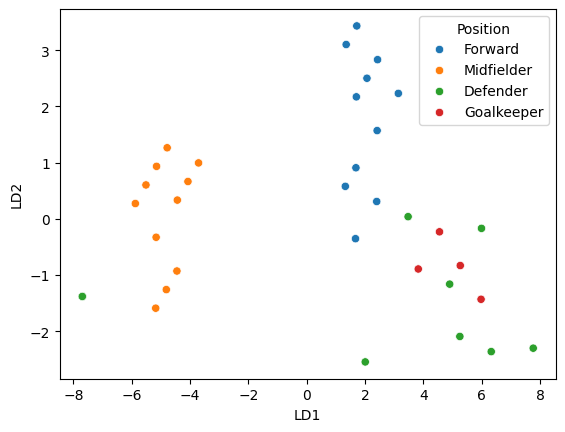

In [ ]:
# prompt: Plot LDA  chart

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an instance of the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model to the data
lda.fit(df_hw_frame, df_frame['Position'])

# Transform the data
X_lda = lda.transform(df_hw_frame)

# Create a DataFrame from the transformed data
df_lda = pd.DataFrame(data=X_lda, columns=['LD1', 'LD2'])

# Add labels to the DataFrame
df_lda['Position'] = df_frame['Position']

# Plot the results
sns.scatterplot(x="LD1", y="LD2", hue="Position", data=df_lda)
plt.show()


In [ ]:
# prompt: plot 3 d for the chart above

fig = px.scatter_3d(df_lda, x="LD1", y="LD2", z="Position", color="Position",
                 title="3D Scatter Plot of soccer Player Height, Weight, and Position")
fig.show()


# K-Nearest Neighbors
Let's use the existing NBA player data to try to classify player positions based on height and weight.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
n = 4  # How many neighbours to use

In [ ]:
df_neigh = KNeighborsClassifier(n_neighbors=n)
df_neigh.fit(df_hw_standardized[['Goals','Shots']],df_frame['Position'])
df_neigh_predictions = df_neigh.predict(df_hw_standardized[['Goals','Shots']])
df_neigh_predictions

array(['Forward', 'Midfielder', 'Defender', 'Goalkeeper', 'Forward',
       'Midfielder', 'Defender', 'Forward', 'Midfielder', 'Defender',
       'Forward', 'Midfielder', 'Defender', 'Goalkeeper', 'Forward',
       'Midfielder', 'Defender', 'Forward', 'Midfielder', 'Defender',
       'Forward', 'Midfielder', 'Defender', 'Goalkeeper', 'Forward',
       'Midfielder', 'Defender', 'Forward', 'Midfielder', 'Defender',
       'Forward', 'Midfielder', 'Defender', 'Goalkeeper', 'Forward',
       'Midfielder', 'Defender', 'Forward'], dtype=object)

Now we can try it on a few possible players.

In [ ]:
Emmanuel = pd.DataFrame([{'Shots':30,'Goals':15}]) #He isn't in the dataset)
Emmanuel = scaler.transform(Emmanuel)
print(df_neigh.predict(Emmanuel))

['Forward']


In [ ]:
Matthew = pd.DataFrame([{'Shots':0,'Goals':10}])  #I've definitely never played
Matthew = scaler.transform(Matthew)
print(df_neigh.predict(Matthew))

['Midfielder']


In [ ]:
df_frame[df_frame['Name'] == 'David Johnson']

,Name,Height (cm),Weight (kg),Position,Goals,Shots,Nationality,Age,Assists,Pass Accuracy (%),...,Offsides,Successful Tackles (%),Blocks,Errors Leading to Goal,Penalties Won,Penalties Conceded,Aerial Duels Won,Aerial Duels Lost,Long Balls,Free Kicks
2,David Johnson,175,70,Midfielder,4,30,England,24,7,85,...,4,80,6,0,1,0,18,7,25,3


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
df_gnb = GaussianNB().fit(df_hw_standardized[['Goals','Shots']],df_frame['Position'])

In [ ]:
from sklearn.naive_bayes import GaussianNB
DF_gnb = GaussianNB().fit(df_hw_standardized[['Goals','Shots']],df_frame['Position'])

In [ ]:
print(df_gnb.predict(Emmanuel))

['Forward']


In [ ]:
print(df_gnb.predict(Matthew))

['Forward']


# Evaluating Classification Performance
There are a number of scores and plots that we can compute or generate to evaluate classification results. We will introduce the following techniques:
- Accuracy
- Precision
- Recall
- F1 score
- Confusion Matrix

First, lets try actually getting a test sample.

In [ ]:
# prompt: Generate accuracy score for the model

from sklearn.metrics import accuracy_score
y_pred = df_neigh.predict(df_hw_standardized[['Goals','Shots']])
acc = accuracy_score(df_frame['Position'], y_pred)
print(acc)


1.0


In [ ]:
# prompt: Generate precision score for the model

from sklearn.metrics import precision_score

y_pred = df_neigh.predict(df_hw_standardized[['Goals','Shots']])
precision = precision_score(df_frame['Position'], y_pred, average='weighted')
print(precision)


1.0


In [ ]:
# prompt: Generate recall score for the model

from sklearn.metrics import recall_score

y_pred = df_neigh.predict(df_hw_standardized[['Goals','Shots']])
recall = recall_score(df_frame['Position'], y_pred, average='weighted')
print(recall)


1.0


In [ ]:
# prompt: Generate FC1 score for the model

from sklearn.metrics import f1_score

y_pred = df_neigh.predict(df_hw_standardized[['Goals','Shots']])
f1 = f1_score(df_frame['Position'], y_pred, average='weighted')
print(f1)


1.0


In [ ]:
# prompt: Compute the confusion matrix

from sklearn.metrics import confusion_matrix

y_pred = df_neigh.predict(df_hw_standardized[['Goals','Shots']])
confusion_matrix = confusion_matrix(df_frame['Position'], y_pred)
print(confusion_matrix)


[[11  0  0  0]
 [ 0 12  0  0]
 [ 0  0  4  0]
 [ 0  0  0 11]]


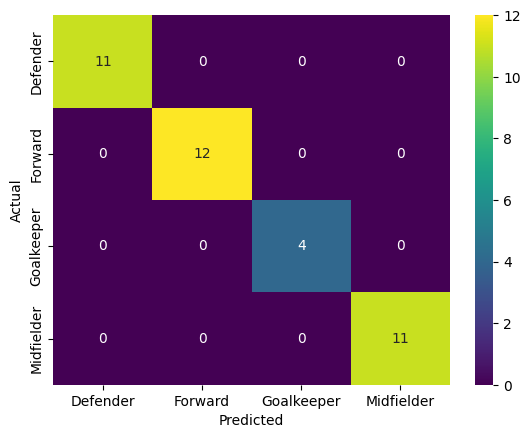

In [ ]:
# prompt: Visualize the confusion matrix table above

import pandas as pd
import seaborn as sns

# Create the confusion matrix
confusion_matrix = pd.crosstab(df_frame['Position'], y_pred, rownames=['Actual'], colnames=['Predicted'])

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix, annot=True, cmap="viridis", fmt="d")
plt.show()
